## 1.IMPORTING LIBRARIES

    *Numpy for linear algebra and data manipulation.
    *Matplotlib for visualising data.
    *Pandas for loading and analyzing data.
    *Sklearn for normalizing the data and creating the model.

In [1]:
import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt

## 2.LOADING AND ANALYZING THE DATA

    *Loading the drug_dataset.csv dataset.
    *The dataset is composed of attributes of patients and different medications.
    *Analyzing the data using pandas.

In [2]:
df = pd.read_csv("drug_dataset.csv")

df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [6]:
print("The dataset consists of {} patients and {} features.".format(df.shape[0], df.shape[1]))

The dataset consists of 200 patients and 6 features.


Let's create independent and dependent variable matrices.

In [52]:
X = df[["Age", "Sex", "BP", "Cholesterol", "Na_to_K"]].values
y = df["Drug"].values

print("Independent variable matrix:\n{}\n\n Dependent variable matrix:\n{}".format(X[:3], y[:3]))

Independent variable matrix:
[[23 'F' 'HIGH' 'HIGH' 25.355]
 [47 'M' 'LOW' 'HIGH' 13.093]
 [47 'M' 'LOW' 'HIGH' 10.114]]

 Dependent variable matrix:
['drugY' 'drugC' 'drugC']


Since there are non-numerical values, we must convert them before training the model with them.

In [53]:
print("Non-numerical columns: {}\n".format(X[1][1:4]))

#For second column:
converter = sklearn.preprocessing.LabelEncoder()
converter.fit(['F', 'M'])
X[:,1] = converter.transform(X[:,1])

converter = sklearn.preprocessing.LabelEncoder()
converter.fit(["LOW", "NORMAL", "HIGH"])
X[:,2] = converter.transform(X[:,2])

converter = sklearn.preprocessing.LabelEncoder()
converter.fit(["NORMAL", "HIGH"])
X[:,3] = converter.transform(X[:,3])

print("Transformed dataset:\n{}".format(X[:3]))

Non-numerical columns: ['M' 'LOW' 'HIGH']

Transformed dataset:
[[23 0 0 0 25.355]
 [47 1 1 0 13.093]
 [47 1 1 0 10.114]]


## 3.PREPARING AND SPLITTING DATA

    *Converting type of the data
    *Normalizing the data
    *Splitting train and test sets.

In [60]:
training_X, test_X, training_y, test_y = sklearn.model_selection.train_test_split(X, y, test_size=0.25)

print("Training data consists of {} patients having {} features.".format(training_X.shape[0], training_X.shape[1]))
print("Test data consists of {} patients having 5 features.".format(test_X.shape[0]))

Training data consists of 150 patients having 5 features.
Test data consists of 50 patients having 5 features.


## 4.CREATING and EVALUATING the MODEL

    *Creating the model using sklearn.
    *Decision tree algorithm is used for picking the most appropriate features and mapping them to the drugs.
    *Evaluating with accuracy metric. Accuracy is 100%.
    *Plotting the tree.

In [71]:
model = sklearn.tree.DecisionTreeClassifier(criterion="entropy", max_depth=4)
model.fit(training_X, training_y)

predictions = model.predict(test_X)

#Let's see if our predictions are true:
print("Real labels: {}\nPredicted labels: {}".format(test_y[:5], predictions[:5]))

Real labels: ['drugY' 'drugY' 'drugA' 'drugY' 'drugX']
Predicted labels: ['drugY' 'drugY' 'drugA' 'drugY' 'drugX']


The first five predictions turn out to be true. We can find its accuracy with a line of code.

In [75]:
from sklearn import metrics
print("Accuracy of our model: %.2f" %metrics.accuracy_score(test_y, predictions))

Accuracy of our model: 1.00


Finally, let's take a look how our decision tree looks like.

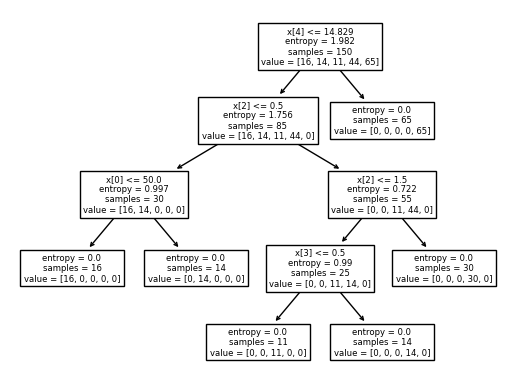

In [81]:
sklearn.tree.plot_tree(model)
plt.show()

## 5.CONCLUSIONS

    *Since all of the predicted labels match the true labels, this model is very accurate.
    *In problems that we can build a decision tree, this algorithm performs well.
    *As we can see entropy converges to 0 when the tree is finalized. Leow entropy means less impurity and more predictionability.  